# SetUp


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  sklearn.model_selection import train_test_split

In [79]:
train_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_train_data.csv", index_col=0)
test_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_test_data.csv", index_col=0)
train_data=train_df_sprit.copy()
test_data=test_df_sprit.copy()

In [80]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [81]:
print(train_data.shape)
print(test_data.shape)

(8864, 17)
(6000, 17)


In [82]:
train_data.head()

,index,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
0,19725,35.0,5.40,159084.0,3.0,1,1,1,1.0,12.27,0,0,-0.23,44.0,4,0,20
1,1889,278.0,27.00,71275.0,3.0,1,0,1,1.0,19.77,0,0,3.67,122.0,9,4,21
2,8956,49.0,3.50,147615.0,3.0,1,0,1,1.0,13.83,0,0,0.33,25.3,11,5,25
3,19634,35.0,5.40,30981.0,2.0,1,0,1,1.0,15.00,0,0,2.50,36.0,11,0,3
4,7443,85.0,8.28,40241.0,2.0,0,1,1,2.0,16.60,0,1,3.90,77.0,2,3,1


In [83]:
test_data.head()

,index,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
0,8622,49.0,15.5,16991.0,3.0,1,1,1,1.0,12.31,0,0,-1.19,54.0,3,0,26
1,14805,49.0,8.1,2565.0,3.0,0,1,1,1.0,12.09,0,0,-0.41,66.8,9,4,13
2,18944,35.0,5.7,25286.0,3.0,1,1,1,1.0,13.57,0,0,1.07,42.0,7,1,22
3,20255,35.0,5.6,160726.0,3.0,1,1,1,1.0,13.33,0,0,0.83,42.0,5,4,29
4,19342,35.0,6.5,69218.0,2.0,1,1,1,1.0,14.77,0,1,2.27,44.0,5,0,2


In [84]:
train_data.drop(columns='index', axis=1,inplace=True)
test_data.drop(columns='index', axis=1,inplace=True)

In [85]:
train_data.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
0,35.0,5.40,159084.0,3.0,1,1,1,1.0,12.27,0,0,-0.23,44.0,4,0,20
1,278.0,27.00,71275.0,3.0,1,0,1,1.0,19.77,0,0,3.67,122.0,9,4,21
2,49.0,3.50,147615.0,3.0,1,0,1,1.0,13.83,0,0,0.33,25.3,11,5,25
3,35.0,5.40,30981.0,2.0,1,0,1,1.0,15.00,0,0,2.50,36.0,11,0,3
4,85.0,8.28,40241.0,2.0,0,1,1,2.0,16.60,0,1,3.90,77.0,2,3,1


In [86]:
test_data.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
0,49.0,15.5,16991.0,3.0,1,1,1,1.0,12.31,0,0,-1.19,54.0,3,0,26
1,49.0,8.1,2565.0,3.0,0,1,1,1.0,12.09,0,0,-0.41,66.8,9,4,13
2,35.0,5.7,25286.0,3.0,1,1,1,1.0,13.57,0,0,1.07,42.0,7,1,22
3,35.0,5.6,160726.0,3.0,1,1,1,1.0,13.33,0,0,0.83,42.0,5,4,29
4,35.0,6.5,69218.0,2.0,1,1,1,1.0,14.77,0,1,2.27,44.0,5,0,2


In [87]:
print(train_data.shape)
print(test_data.shape)

(8864, 16)
(6000, 16)


In [88]:
#X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_train_sprit=train_data.drop(columns=['trip_distance(km)'],axis=1)
y_train_sprit=train_data['trip_distance(km)']
#X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_test_sprit=test_data.drop(columns=['trip_distance(km)'],axis=1)
y_test_sprit=test_data['trip_distance(km)']

# K-means 

In [89]:
#X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_train_sprit=scalled_train.drop(columns=['trip_distance(km)'],axis=1)
# y_train_sprit=scalled_train['trip_distance(km)']
#X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_test_sprit=test_df_sprit.drop(columns=['trip_distance(km)'],axis=1)
# y_test_sprit=test_df_sprit['trip_distance(km)']

In [90]:
scaler=RobustScaler()

In [91]:
categorical_columns=['tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style',
       'A/C', 'park_heating', 'weekday','month','day']

In [92]:
numeric_columns= ['power(kW)', 'quantity(kWh)', 'odometer','consumption(kWh/100km)','ecr_deviation','trip_distance(km)']

# 'trip_distance(km)'

In [93]:
train_data.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
0,35.0,5.40,159084.0,3.0,1,1,1,1.0,12.27,0,0,-0.23,44.0,4,0,20
1,278.0,27.00,71275.0,3.0,1,0,1,1.0,19.77,0,0,3.67,122.0,9,4,21
2,49.0,3.50,147615.0,3.0,1,0,1,1.0,13.83,0,0,0.33,25.3,11,5,25
3,35.0,5.40,30981.0,2.0,1,0,1,1.0,15.00,0,0,2.50,36.0,11,0,3
4,85.0,8.28,40241.0,2.0,0,1,1,2.0,16.60,0,1,3.90,77.0,2,3,1


In [94]:
# Seperating Categorical Variables
train_cat=train_data.loc[:, categorical_columns].reset_index().drop(columns='index', axis=1)
test_cat=test_data.loc[:, categorical_columns].reset_index().drop(columns='index', axis=1)

In [95]:
# Seperating Numerical variables
train_scalling=train_data.loc[:, numeric_columns].reset_index().drop(columns='index', axis=1)
test_scalling=test_data.loc[:, numeric_columns].reset_index().drop(columns='index', axis=1)

In [96]:
# Scaling Numerical variables
scalled_train=pd.DataFrame(scaler.fit_transform(train_scalling), columns=train_scalling.columns)
scalled_test=pd.DataFrame(scaler.transform(test_scalling), columns=test_scalling.columns)

In [97]:
#Merging Scaled Numerical and Unscaled categorical
train_data_kmeans=pd.concat( [scalled_train, train_cat], axis=1)
test_data_kmeans=pd.concat( [scalled_test, test_cat], axis=1)

In [98]:
test_data_kmeans.shape

(6000, 16)

In [99]:
train_data_kmeans.shape

(8864, 16)

In [100]:
train_data_kmeans.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day
0,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,-0.215686,3.0,1,1,1,1.0,0,0,0,4,20
1,2.385542,2.202381,-0.008532,0.841935,0.368363,1.313725,3.0,1,0,1,1.0,0,0,4,9,21
2,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,-0.582353,3.0,1,0,1,1.0,0,0,5,11,25
3,-0.542169,-0.369048,-0.528641,0.072581,0.109513,-0.372549,2.0,1,0,1,1.0,0,0,0,11,3
4,0.060241,-0.026190,-0.409114,0.330645,0.419248,0.431373,2.0,0,1,1,2.0,0,1,3,2,1


In [101]:
test_data_kmeans.shape

(6000, 16)

In [102]:
test_data_kmeans.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day
0,-0.373494,0.833333,-0.709222,-0.361290,-0.706858,-0.019608,3.0,1,1,1,1.0,0,0,0,3,26
1,-0.373494,-0.047619,-0.895430,-0.396774,-0.534292,0.231373,3.0,0,1,1,1.0,0,0,4,9,13
2,-0.542169,-0.333333,-0.602151,-0.158065,-0.206858,-0.254902,3.0,1,1,1,1.0,0,0,1,7,22
3,-0.542169,-0.345238,1.146088,-0.196774,-0.259956,-0.254902,3.0,1,1,1,1.0,0,0,4,5,29
4,-0.542169,-0.238095,-0.035084,0.035484,0.058628,-0.215686,2.0,1,1,1,1.0,0,1,0,5,2


In [103]:
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data_kmeans)
    sse.append(kmeans.inertia_)

/home/shruthi/.cache/pypoetry/virtualenvs/workenv-2ot1sL2l-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shruthi/.cache/pypoetry/virtualenvs/workenv-2ot1sL2l-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shruthi/.cache/pypoetry/virtualenvs/workenv-2ot1sL2l-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shruthi/.cache/pypoetry/virtualenvs/workenv-2ot1sL2l-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWar

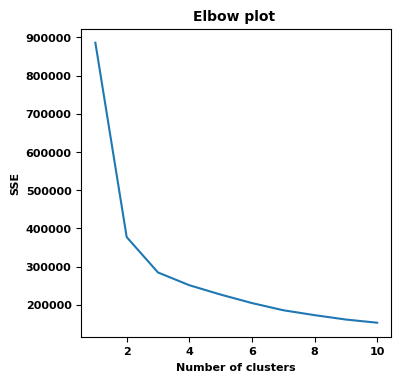

In [104]:
plt.figure(figsize=(4, 4))
plt.plot(range(1,11), sse)
plt.title('Elbow plot ',weight='bold', size=10)
plt.xlabel("Number of clusters",weight='bold', size=8)
plt.ylabel('SSE', weight='bold', size=8)
plt.xticks(weight='bold', size=8)
plt.yticks(weight='bold', size=8)

plt.show()

## Kmean with 2 clusters

In [105]:
kmeans = KMeans(n_clusters=2)
kidx=kmeans.fit(train_data_kmeans)
labels=kmeans.labels_

/home/shruthi/.cache/pypoetry/virtualenvs/workenv-2ot1sL2l-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [106]:
train_data_kmeans.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day
0,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,-0.215686,3.0,1,1,1,1.0,0,0,0,4,20
1,2.385542,2.202381,-0.008532,0.841935,0.368363,1.313725,3.0,1,0,1,1.0,0,0,4,9,21
2,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,-0.582353,3.0,1,0,1,1.0,0,0,5,11,25
3,-0.542169,-0.369048,-0.528641,0.072581,0.109513,-0.372549,2.0,1,0,1,1.0,0,0,0,11,3
4,0.060241,-0.026190,-0.409114,0.330645,0.419248,0.431373,2.0,0,1,1,2.0,0,1,3,2,1


In [107]:
train_data_kmeans.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day
0,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,-0.215686,3.0,1,1,1,1.0,0,0,0,4,20
1,2.385542,2.202381,-0.008532,0.841935,0.368363,1.313725,3.0,1,0,1,1.0,0,0,4,9,21
2,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,-0.582353,3.0,1,0,1,1.0,0,0,5,11,25
3,-0.542169,-0.369048,-0.528641,0.072581,0.109513,-0.372549,2.0,1,0,1,1.0,0,0,0,11,3
4,0.060241,-0.026190,-0.409114,0.330645,0.419248,0.431373,2.0,0,1,1,2.0,0,1,3,2,1


In [108]:
labels_df=pd.DataFrame(labels).rename({0:'labels'},axis=1)
kmeans_cluster_train_df=pd.concat([train_data_kmeans, labels_df], axis=1)
test_labels=kmeans.predict(test_data_kmeans)
test_labels_df=pd.DataFrame(test_labels).rename({0:'labels'},axis=1)
kmeans_cluster_test_df=pd.concat([test_data_kmeans, test_labels_df], axis=1)

In [109]:
kmeans_cluster_train_df.shape

(8864, 17)

In [110]:
kmeans_cluster_test_df.shape

(6000, 17)

In [111]:
kmeans_cluster_train_df.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day,labels
0,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,-0.215686,3.0,1,1,1,1.0,0,0,0,4,20,0
1,2.385542,2.202381,-0.008532,0.841935,0.368363,1.313725,3.0,1,0,1,1.0,0,0,4,9,21,0
2,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,-0.582353,3.0,1,0,1,1.0,0,0,5,11,25,0
3,-0.542169,-0.369048,-0.528641,0.072581,0.109513,-0.372549,2.0,1,0,1,1.0,0,0,0,11,3,1
4,0.060241,-0.026190,-0.409114,0.330645,0.419248,0.431373,2.0,0,1,1,2.0,0,1,3,2,1,1


In [112]:
kmeans_cluster_test_df.head()

,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,weekday,month,day,labels
0,-0.373494,0.833333,-0.709222,-0.361290,-0.706858,-0.019608,3.0,1,1,1,1.0,0,0,0,3,26,0
1,-0.373494,-0.047619,-0.895430,-0.396774,-0.534292,0.231373,3.0,0,1,1,1.0,0,0,4,9,13,1
2,-0.542169,-0.333333,-0.602151,-0.158065,-0.206858,-0.254902,3.0,1,1,1,1.0,0,0,1,7,22,0
3,-0.542169,-0.345238,1.146088,-0.196774,-0.259956,-0.254902,3.0,1,1,1,1.0,0,0,4,5,29,0
4,-0.542169,-0.238095,-0.035084,0.035484,0.058628,-0.215686,2.0,1,1,1,1.0,0,1,0,5,2,1


In [113]:
kmeans_cluster_train_df.columns

Index(['power(kW)', 'quantity(kWh)', 'odometer', 'consumption(kWh/100km)',
       'ecr_deviation', 'trip_distance(km)', 'tire_type', 'city', 'motor_way',
       'country_roads', 'driving_style', 'A/C', 'park_heating', 'weekday',
       'month', 'day', 'labels'],
      dtype='object')

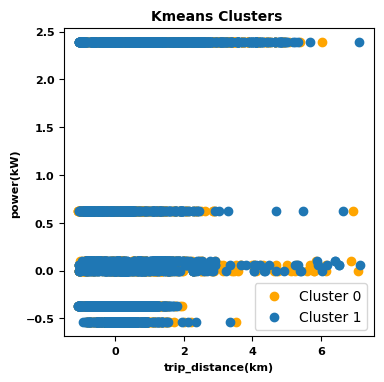

In [114]:
#plotting the results:for i in u_labels:
plt.figure(figsize=(4, 4))
plt.scatter(y=kmeans_cluster_train_df.loc[kmeans_cluster_train_df['labels'] == 0, 'power(kW)'] ,
            x=kmeans_cluster_train_df.loc[kmeans_cluster_train_df['labels'] == 0, 'trip_distance(km)'] , 
            label = 'Cluster '+str(0), color='orange')
plt.scatter(y=kmeans_cluster_train_df.loc[kmeans_cluster_train_df['labels'] == 1, 'power(kW)'] ,
            x=kmeans_cluster_train_df.loc[kmeans_cluster_train_df['labels'] == 1, 'trip_distance(km)'] , 
            label = 'Cluster '+str(1))
plt.title('Kmeans Clusters ',weight='bold', size=10)
plt.ylabel('power(kW)',weight='bold', size=8)
plt.xlabel('trip_distance(km)',weight='bold', size=8)
plt.xticks(weight='bold', size=8)
plt.yticks(weight='bold', size=8)
#plt.ylim(-0.5,1.5)
plt.legend()
plt.show()


## Segregate Kmeans Cluster for Personalization

## Inference of Clusters

In [115]:
## Cluster 0 Cars with high power,  any value of quantity, summer tire and winter tire are grouped as one
#High Powered Cars didn't switch on park_heating, all distance 




### Cluster 1= Cars with the medium power and medium quantity,  all type tire  are clustred, more distance 
## Cluster 2=Cars with power less than 100 kw are clustered to one group. low distance 

# Predprocessing for federated Learning 

In [116]:
def preprocessForFedTree(train_df, test_df, type):
  
       #rename target variable 
       # change target variable name to y
       train_df.rename({'trip_distance(km)':'y'}, axis=1,inplace=True)
       test_df.rename({'trip_distance(km)':'y'}, axis=1,inplace=True)
       
       # reshuffle columns to put target variable first
       columns=['y','power(kW)', 'quantity(kWh)', 'odometer', 'consumption(kWh/100km)',
       'ecr_deviation',  'month', 'weekday', 'day', 'tire_type', 'city', 
       'motor_way', 'country_roads', 'driving_style', 'A/C', 'park_heating']
       ## adding labels column for kmeans clustering
       if type=='kmeans':
         columns.append('labels')
         
       train_df=train_df.loc[:, columns]
       test_df=test_df.loc[:, columns]

       #creating id column
       train_df.reset_index(inplace=True)
       test_df.reset_index(inplace=True)

       train_df.rename({'index':'id'},axis=1, inplace=True)
       test_df.rename({'index':'id'},axis=1, inplace=True)
       
       return train_df, test_df
       

In [117]:
kmeans_train,kmeans_test= preprocessForFedTree(kmeans_cluster_train_df, kmeans_cluster_test_df, 'kmeans')

In [118]:
print(kmeans_train.shape)
print(kmeans_test.shape)

(8864, 18)
(6000, 18)


# Seperating cluster data 

In [119]:
kmeans_cluster_train_df_0=pd.DataFrame()
kmeans_cluster_train_df_1=pd.DataFrame()

In [120]:

#don't divide test data for fedtree
kmeans_cluster_train_df_0=kmeans_train[kmeans_train['labels']==0]
kmeans_cluster_train_df_1=kmeans_train[kmeans_train['labels']==1]

In [121]:
print(kmeans_cluster_train_df_0.shape)
print(kmeans_cluster_train_df_1.shape)

(4448, 18)
(4416, 18)


In [122]:
kmeans_cluster_train_df_0.head()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,labels
0,0,-0.215686,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,4,0,20,3.0,1,1,1,1.0,0,0,0
1,1,1.313725,2.385542,2.202381,-0.008532,0.841935,0.368363,9,4,21,3.0,1,0,1,1.0,0,0,0
2,2,-0.582353,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,11,5,25,3.0,1,0,1,1.0,0,0,0
6,6,0.992157,-0.373494,0.416667,0.454627,-0.514516,-0.917035,4,5,23,3.0,1,0,1,3.0,0,0,0
7,7,1.350980,0.096386,1.025000,-0.406791,-0.119355,0.077072,11,5,30,3.0,1,1,1,2.0,0,0,0


In [123]:
#drop column in both the cluster
kmeans_cluster_train_df_0.drop(columns='labels', axis=1, inplace=True)
kmeans_cluster_train_df_1.drop(columns='labels', axis=1, inplace=True)

In [124]:
kmeans_test.drop(columns='labels', axis=1, inplace=True)

In [125]:
kmeans_test.head()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
0,0,-0.019608,-0.373494,0.833333,-0.709222,-0.361290,-0.706858,3,0,26,3.0,1,1,1,1.0,0,0
1,1,0.231373,-0.373494,-0.047619,-0.895430,-0.396774,-0.534292,9,4,13,3.0,0,1,1,1.0,0,0
2,2,-0.254902,-0.542169,-0.333333,-0.602151,-0.158065,-0.206858,7,1,22,3.0,1,1,1,1.0,0,0
3,3,-0.254902,-0.542169,-0.345238,1.146088,-0.196774,-0.259956,5,4,29,3.0,1,1,1,1.0,0,0
4,4,-0.215686,-0.542169,-0.238095,-0.035084,0.035484,0.058628,5,0,2,2.0,1,1,1,1.0,0,1


In [126]:
kmeans_cluster_train_df_0.head()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
0,0,-0.215686,-0.542169,-0.369048,1.124893,-0.367742,-0.494469,4,0,20,3.0,1,1,1,1.0,0,0
1,1,1.313725,2.385542,2.202381,-0.008532,0.841935,0.368363,9,4,21,3.0,1,0,1,1.0,0,0
2,2,-0.582353,-0.373494,-0.595238,0.976853,-0.116129,-0.370575,11,5,25,3.0,1,0,1,1.0,0,0
6,6,0.992157,-0.373494,0.416667,0.454627,-0.514516,-0.917035,4,5,23,3.0,1,0,1,3.0,0,0
7,7,1.350980,0.096386,1.025000,-0.406791,-0.119355,0.077072,11,5,30,3.0,1,1,1,2.0,0,0


In [127]:
kmeans_test.shape

(6000, 17)

## Writing files

In [128]:
path='/home/shruthi/workenv/FedTree/dataset/spritmonitor/kmeans'
kmeans_cluster_train_df_0.to_csv(path+'/kmeans_cluster_train_df_031523_p0.csv', index=0)
kmeans_cluster_train_df_1.to_csv(path+'/kmeans_cluster_train_df_031523_p1.csv',  index=0)
kmeans_test.to_csv(path+'/kmeans_cluster_test_df_031523.csv', index=0)




In [129]:

kmeans_cluster_train_df_0.to_csv('..//kmeans_cluster_train_df_031523_p0.csv', index=0)
kmeans_cluster_train_df_1.to_csv(path+'/kmeans_cluster_train_df_031523_p1.csv',  index=0)
kmeans_test.to_csv(path+'/kmeans_cluster_test_df_031523.csv', index=0)

# Partition Driving style 

In [130]:
driving_style_train,driving_style_test= preprocessForFedTree(train_df_sprit, test_df_sprit, 'driving_style')

In [131]:
train_df_fast_p0=pd.DataFrame()
train_df_moderate_p1=pd.DataFrame()
train_df_normal_p2=pd.DataFrame()

In [132]:
train_df_fast_p0=driving_style_train[driving_style_train['driving_style']==1].copy()
train_df_moderate_p1=driving_style_train[driving_style_train['driving_style']==2].copy()
train_df_normal_p2=driving_style_train[driving_style_train['driving_style']==3].copy()

In [133]:
print(train_df_fast_p0.shape)
print(train_df_moderate_p1.shape)
print(train_df_normal_p2.shape)

(6160, 17)
(2115, 17)
(589, 17)


In [134]:
train_df_fast_p0.tail()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
8858,14717,48.8,49.0,7.07,13839.0,14.88,2.38,2,1,4,2.0,1,0,1,1.0,0,0
8859,20426,41.0,35.0,6.00,103052.0,14.63,2.13,10,2,11,3.0,1,1,1,1.0,0,0
8860,20724,42.0,35.0,8.60,174117.0,20.48,7.98,2,2,10,2.0,1,1,1,1.0,0,1
8861,1606,119.0,278.0,10.00,141320.0,28.34,12.24,1,5,15,2.0,1,0,1,1.0,0,0
8862,2526,238.0,278.0,31.00,69779.0,20.92,4.82,9,3,13,3.0,0,1,0,1.0,0,0


## Splitting data 

In [135]:
def splittestdata(test_df):
    test_df_temp=test_df.copy()
    test_df_temp=test_df_temp.sample(frac = 1, random_state = 200)
    test_df_val=test_df.iloc[:test_df.shape[0]//2, :]
    test_df_pred=test_df.iloc[test_df.shape[0]//2:, :]
    return test_df_val, test_df_pred

In [136]:
#driving_style_val, driving_style_pred=splittestdata(driving_style_test)

In [137]:
path='/home/shruthi/workenv/FedTree/dataset/spritmonitor/kmeans'
train_df_fast_p0.to_csv(path+"/train_df_fast_p0_03072023.csv", index=0)
train_df_moderate_p1.to_csv(path+"/train_df_moderate_p1_03072023.csv", index=0)
train_df_normal_p2.to_csv(path+'/train_df_normal_p2_03072023.csv', index=0)
driving_style_test.to_csv(path+'/test_converted_distributed.csv', index=0)

# Consumption

In [138]:
train_df_sprit.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,y,month,weekday,day
19725,35.0,5.40,159084.0,3.0,1,1,1,1.0,12.27,0,0,-0.23,44.0,4,0,20
1889,278.0,27.00,71275.0,3.0,1,0,1,1.0,19.77,0,0,3.67,122.0,9,4,21
8956,49.0,3.50,147615.0,3.0,1,0,1,1.0,13.83,0,0,0.33,25.3,11,5,25
19634,35.0,5.40,30981.0,2.0,1,0,1,1.0,15.00,0,0,2.50,36.0,11,0,3
7443,85.0,8.28,40241.0,2.0,0,1,1,2.0,16.60,0,1,3.90,77.0,2,3,1


In [139]:
train_df_sprit.shape

(8864, 16)

In [140]:
train_df_sprit['consumption(kWh/100km)'].describe()

count    8864.000000
mean       16.128046
std         6.331096
min         5.830000
25%        12.600000
50%        14.550000
75%        18.800000
max       405.080000
Name: consumption(kWh/100km), dtype: float64

In [141]:
train_df_sprit[train_df_sprit['consumption(kWh/100km)']>30].count()

power(kW)                 45
quantity(kWh)             45
odometer                  45
tire_type                 45
city                      45
motor_way                 45
country_roads             45
driving_style             45
consumption(kWh/100km)    45
A/C                       45
park_heating              45
ecr_deviation             45
y                         45
month                     45
weekday                   45
day                       45
dtype: int64

In [142]:
train_df, test_df=preprocessForFedTree(train_df_sprit, test_df_sprit, 'consumption')

In [143]:
test_df.head()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
0,8622,54.0,49.0,15.5,16991.0,12.31,-1.19,3,0,26,3.0,1,1,1,1.0,0,0
1,14805,66.8,49.0,8.1,2565.0,12.09,-0.41,9,4,13,3.0,0,1,1,1.0,0,0
2,18944,42.0,35.0,5.7,25286.0,13.57,1.07,7,1,22,3.0,1,1,1,1.0,0,0
3,20255,42.0,35.0,5.6,160726.0,13.33,0.83,5,4,29,3.0,1,1,1,1.0,0,0
4,19342,44.0,35.0,6.5,69218.0,14.77,2.27,5,0,2,2.0,1,1,1,1.0,0,1


In [144]:
train_df.head()

,id,y,power(kW),quantity(kWh),odometer,consumption(kWh/100km),ecr_deviation,month,weekday,day,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
0,19725,44.0,35.0,5.40,159084.0,12.27,-0.23,4,0,20,3.0,1,1,1,1.0,0,0
1,1889,122.0,278.0,27.00,71275.0,19.77,3.67,9,4,21,3.0,1,0,1,1.0,0,0
2,8956,25.3,49.0,3.50,147615.0,13.83,0.33,11,5,25,3.0,1,0,1,1.0,0,0
3,19634,36.0,35.0,5.40,30981.0,15.00,2.50,11,0,3,2.0,1,0,1,1.0,0,0
4,7443,77.0,85.0,8.28,40241.0,16.60,3.90,2,3,1,2.0,0,1,1,2.0,0,1


In [145]:
def splitBasenConumption(train_df):
    train_df_p0=train_df[train_df['consumption(kWh/100km)']<=14.0].copy()
    train_df_p1=train_df[(train_df['consumption(kWh/100km)']>14.0) & (train_df['consumption(kWh/100km)']<=20.0)].copy()
    train_df_p2=train_df[train_df['consumption(kWh/100km)']>20.0 ].copy()
    return train_df_p0, train_df_p1,train_df_p2
    

In [146]:
train_df_p0, train_df_p1,train_df_p2=splitBasenConumption(train_df)

In [147]:
train_df_p0.shape

(3816, 17)

In [148]:
train_df_p1.shape

(3185, 17)

In [149]:
train_df_p2.shape

(1863, 17)

In [150]:
path='/home/shruthi/workenv/FedTree/dataset/spritmonitor/consumption'
train_df_p0.to_csv(path+"/train_df_p0.csv", index=0)
train_df_p1.to_csv(path+"/train_df_p1.csv", index=0)
train_df_p2.to_csv(path+'/train_df_p2.csv', index=0)


In [151]:
test_df.shape

(6000, 17)

In [152]:
test_df_train=test_df.iloc[:3000].copy()
test_df_scope=test_df.iloc[3000:].copy()

In [153]:
test_df_train.to_csv(path+"/test_df_train.csv", index=0)
test_df_scope.to_csv(path+"/test_df_scope.csv", index=0)